# Multiple Regression

Let's grab a small little data set of Blue Book car values:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


To read about the blue book on Wikipedia:
### [Kelley Blue Book](https://en.wikipedia.org/wiki/Kelley_Blue_Book)

In [2]:
df.shape

(804, 12)

In [3]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [4]:
df.Mileage.max()

50387

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


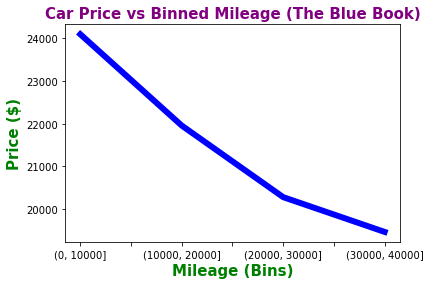

In [5]:
%matplotlib inline

# Importing libraries

import numpy as np
import matplotlib.pyplot as plt

# Looking at Price vs Mileage, divided to bins of 10k miles each

df1=df[['Mileage','Price']]
bins =  np.arange(0, 50000, 10000)

# Cutting the mileage and price dataframe to mileage bins, and calculating the mean for each bin

groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()
print(groups)

# Plotting the data

groups['Price'].plot.line(lw = 6, c = "blue")
plt.xlabel("Mileage (Bins)", c = "green", fontsize = 15, weight = "bold")
plt.ylabel("Price ($)", c = "g", fontsize = 15, weight = "bold")
plt.title("Car Price vs Binned Mileage (The Blue Book)"\
          , color = "purple", weight = "bold", fontsize = 15)
plt.savefig("C:\\MLCourse\\cars1.png", format = "png")

We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Note how we are avoiding the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [6]:
# Import libraries

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]

y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

# Add a constant column to our model so we can have a Y-intercept
X = sm.add_constant(X)

print (X)

est = sm.OLS(y, X).fit()

print(est.summary())

C:\Users\Einat Willmott\AppData\Local\Temp\ipykernel_14076\557676269.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           3.95e-77
Time:                        17:47:29   Log-Likelihood:                -8356.7
No. Observ

The table of coefficients above gives us the values to plug into an equation of form:
    B0 + B1 * Mileage + B2 * cylinders + B3 * doors
    
In this example, it's pretty clear that the number of cylinders is more important than anything based on the coefficients.

Could we have figured that out earlier?

In [7]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [8]:
y.head()

0    17314.103129
1    17542.036083
2    16218.847862
3    16336.913140
4    16339.170324
Name: Price, dtype: float64

Surprisingly, more doors does not mean a higher price! (Maybe it implies a sport car in some cases?) So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.

How would you use this to make an actual prediction? Start by scaling your multiple feature variables into the same scale used to train the model, then just call est.predict() on the scaled features:

In [9]:
scaled = scale.transform([[45000, 11, 3]])
scaled = np.insert(scaled[0], 0, 1) # Need to add that constant column in again.
print(scaled)

predicted = est.predict(scaled)
print(predicted)
print(scaled.shape)
print(scaled[0])

[ 1.          3.07256589  4.13317595 -0.62069018]
[41399.48520326]
(4,)
1.0


## Activity

Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?

**Further questions:**  
* How good would Doors be as a single predictor?  
* It is possible to compare a graph of Doors as a single predictor vs. the actual price.  
* It is also possible do a similar graph for multiple regression with 3 predictors vs. actual price.

# Outliers

I am going to remove outliers.  
  
It is possible to remove outliers from Price and Mileage columns, and from Doors and Cylinders, if there are any.

In [10]:
X.columns

Index(['const', 'Mileage', 'Cylinder', 'Doors'], dtype='object')

In [11]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

### Visualizing Outliers with a Boxplot

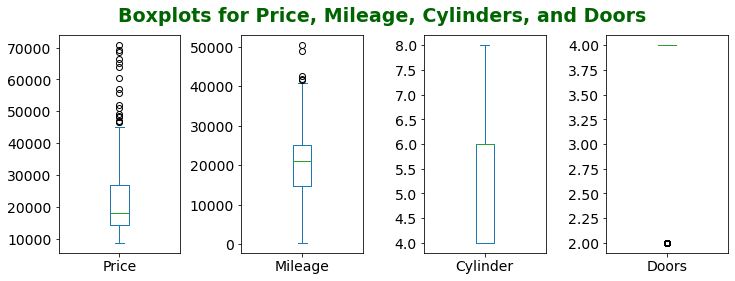

In [12]:
# I am using pandas plot() function with kind = 'box', 
# so that I can select sharey = False, to have a separate y-axis for each boxplot.

df[['Price', 'Mileage', 'Cylinder',
       'Doors']].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(12, 4),
    fontsize = 14
)

# Increase space between subplots:

plt.subplots_adjust(wspace=0.5) 
plt.suptitle("Boxplots for Price, Mileage, Cylinders, and Doors", fontsize = 19,\
             weight = "bold",\
             color = "darkgreen")
plt.show()

There are outliers in the Price and Mileage columns.

```
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(df[['Price', 'Mileage', 'Cylinder',
       'Doors']])
plt.title("Boxplot showing Outliers")
ax.set_xticklabels(['Price', 'Mileage', 'Cylinder',
       'Doors'])

# plt.xlabel(['Price', 'Mileage', 'Cylinder','Doors'])
# plt.ylabel("Mileage")
```

***To do***:  
- add xlabel descriptors - **done**; with:  
`ax.set_xticklabels(['Price', 'Mileage', 'Cylinder', 'Doors'])`.
- make the y-axis indepdendent for each boxplot - **done** above, using `.plot()` rather than `boxplot()`.

<AxesSubplot:>

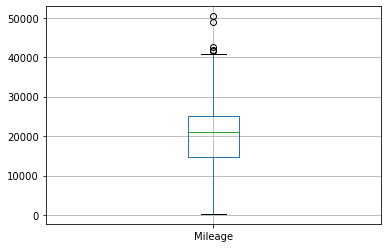

In [13]:
df[["Mileage"]].boxplot()

From the Mileage boxplot above it seems there are *high* mileage outliers, seemingly at > 40K miles.

<AxesSubplot:>

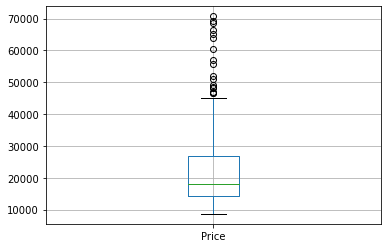

In [14]:
df[["Price"]].boxplot()

There are a lot of Price outliers, seemingly at > 45K dollars.

<AxesSubplot:>

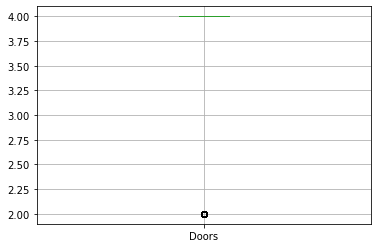

In [15]:
df[["Doors"]].boxplot()

In [16]:
X.columns

Index(['const', 'Mileage', 'Cylinder', 'Doors'], dtype='object')

<AxesSubplot:>

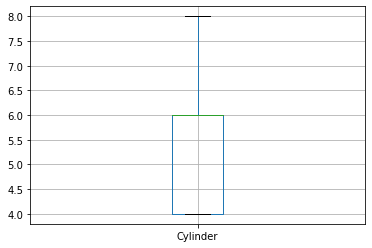

In [17]:
df[["Cylinder"]].boxplot()

There seem to be no outliers for **Cylinders** or for **Doors**.  
  
Therefore, I am going to remove the *high* outliers based on the columns of **Price** and **Mileage**.

### Removing Outliers

**Plan** --  
I need a function that:  
1. Receives a dataframe and a column name; 
2. Calculates the outliers for that column, and;  
3. Drops outliers from the dataframe based on that column.

In [18]:
def reject_outliers(df, column):
    
    u = np.median(df[column])
    s = np.std(df[column])
    
    min_o, max_o = u - 2 * s,  u + 2 * s
    
    df1 = df.copy()
    
    for x in df1.index:
          if ((df1.loc[x, column] > max_o) or (df1.loc[x, column] < min_o)):
                
            df1.drop(x, inplace = True)
            
    return df1

#    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
#    return filtered

### Removing Outliers based on Price and Mileage

In [19]:
df.shape

(804, 12)

I will first remove outliers from **Price** using the function I built above.

In [20]:
df1 = reject_outliers(df, "Price")
df1.shape

(746, 12)

I removed `804 - 746 = 58` outliers from the dataframe based on **Price**.

I will now remove outliers based on **Mileage**.

In [21]:
df2 = reject_outliers(df1, "Mileage")
df2.shape

(699, 12)

I removed `746 - 699 = 47` outliers based on the Mileage column.

**Further improvement:** 
  
The function above could be improved, if it received a list of columns to remove outliers from, and it would go through the list, until it removed all outliers based on all columns provided.

I am going to run multiple regression as above, and see whether I am getting a better **r2 score**.

### Model after rejecting Outliers

In [22]:
# Import libraries

# import statsmodels.api as sm
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()

X = df2[['Mileage', 'Cylinder', 'Doors']]

y = df2['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

# Add a constant column to our model so we can have a Y-intercept
X = sm.add_constant(X)

print (X)

est = sm.OLS(y, X).fit()

print(est.summary())

     const   Mileage  Cylinder     Doors
0      1.0 -1.840161  0.726906  0.535997
1      1.0 -1.705180  0.726906  0.535997
2      1.0 -1.105443  0.726906  0.535997
3      1.0 -0.640835  0.726906  0.535997
4      1.0 -0.125424  0.726906  0.535997
..     ...       ...       ...       ...
799    1.0 -0.657523  0.726906  0.535997
800    1.0 -0.234266  0.726906  0.535997
801    1.0 -0.029135  0.726906  0.535997
802    1.0  0.782378  0.726906  0.535997
803    1.0  2.212384  0.726906  0.535997

[699 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     44.09
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           4.30e-26
Time:                        17:47:33   Log-Likelihood:                -7126.4
No. Observ

C:\Users\Einat Willmott\AppData\Local\Temp\ipykernel_14076\2787596876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


## Results

**R2 score** after removing outliers is **0.16**, in comparison with R2 score of **0.36** before removing outliers.  
The change in R2 score could possibly be explained by the change in variance of the original data after removing outliers, as r2 score is calculated as “**(total variance explained by model) / total variance**”. However, reducing total variance should cause r2 score to increase, which is not the case here.

In [23]:
scaled = scale.transform([[45000, 11, 3]])
scaled = np.insert(scaled[0], 0, 1) #Need to add that constant column in again.
print(scaled)

predicted = est.predict(scaled)
print(predicted)
print(scaled.shape)
print(scaled[0])

[ 1.          3.59143915  4.77234876 -0.66484247]
[30550.3944346]
(4,)
1.0


The price predicted for the same car as above is very different now - ~30k, instead of ~40k as calculated above using a model built before removing outliers.

### Visualizing boxplots after removing outliers

<AxesSubplot:>

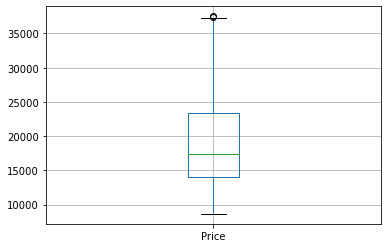

In [24]:
df2[["Price"]].boxplot()

<AxesSubplot:>

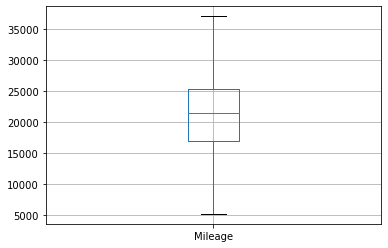

In [25]:
df2[["Mileage"]].boxplot()

From the two boxplots above it is clear that the Price and Mileage outliers have been successfully removed from the dataframe.